In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import tensorflow

2025-09-02 19:35:57.297889: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756841757.582358      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756841757.663492      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
from tensorflow.keras.utils import image_dataset_from_directory

In [5]:
traindata, testdata = image_dataset_from_directory("/kaggle/input/fruits-dataset-images/images/",
                                      validation_split=0.3,subset='both',
                                                  seed=32, label_mode='categorical')

Found 360 files belonging to 9 classes.
Using 252 files for training.
Using 108 files for validation.


2025-09-02 19:36:14.398757: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [6]:
help(traindata.take)

Help on method take in module tensorflow.python.data.ops.dataset_ops:

take(count, name=None) -> 'DatasetV2' method of tensorflow.python.data.ops.prefetch_op._PrefetchDataset instance
    Creates a `Dataset` with at most `count` elements from this dataset.
    
    >>> dataset = tf.data.Dataset.range(10)
    >>> dataset = dataset.take(3)
    >>> [a.item() for a in dataset.as_numpy_iterator()]
    [0, 1, 2]
    
    Args:
      count: A `tf.int64` scalar `tf.Tensor`, representing the number of
        elements of this dataset that should be taken to form the new dataset.
        If `count` is -1, or if `count` is greater than the size of this
        dataset, the new dataset will contain all elements of this dataset.
      name: (Optional.) A name for the tf.data operation.
    
    Returns:
      A new `Dataset` with the transformation applied as described above.



In [7]:
iterator = traindata.take(252).as_numpy_iterator()

In [8]:
images = iterator.next()

In [9]:
len(images[0][0])

256

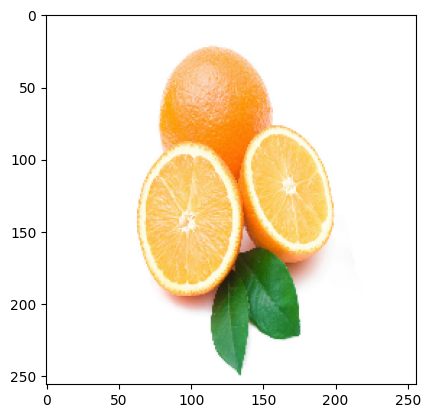

In [10]:
import matplotlib.pyplot as plt

plt.imshow(images[0][0].astype('uint8'))

## Creating the CNN Model

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPool2D, Conv2D, Flatten, Dense

In [12]:
model = Sequential([
    Conv2D(63,kernel_size=(3,3),activation='relu', input_shape=(256,256,3)),
    MaxPool2D(),
    Flatten(),
    Dense(9,activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
    ],
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
history = model.fit(traindata, epochs=2)

Epoch 1/2
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.1596 - loss: 12168.7236
Epoch 2/2
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.1757 - loss: 15712.3252


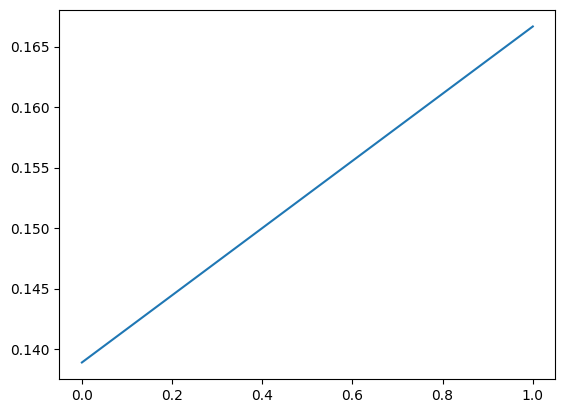

In [14]:
plt.plot(history.history['accuracy'])

In [15]:
history.history

{'accuracy': [0.1388888955116272, 0.1666666716337204],
 'loss': [19806.623046875, 12559.08203125]}

## Predict

In [16]:
results = model.predict(testdata)

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 468ms/step


In [17]:
len(results)

108

In [18]:
results[0]

array([0.        , 0.        , 0.        , 0.        , 0.99999994,
       0.        , 0.        , 0.        , 0.        ], dtype=float32)

In [19]:
for i in results:
    print(np.argmax(i))
    break

4


In [20]:
images = []
classes = []


In [21]:
images = []
classes = []

for imagebatch, classbatch in testdata:
    images.extend(imagebatch.numpy())
    classes.extend(classbatch.numpy())


In [22]:
len(images)

108

In [23]:
images[2]

array([[[144.75, 120.25, 106.75],
        [149.75, 122.25, 104.5 ],
        [180.5 , 154.5 , 137.5 ],
        ...,
        [120.5 ,  95.5 ,  90.5 ],
        [122.  ,  95.  ,  86.  ],
        [131.5 , 104.5 ,  95.5 ]],

       [[163.  , 135.  , 118.5 ],
        [174.25, 141.5 , 122.  ],
        [180.75, 150.25, 134.75],
        ...,
        [123.25,  98.25,  93.25],
        [127.25, 100.25,  91.25],
        [126.25,  99.25,  90.25]],

       [[156.  , 130.  , 113.  ],
        [173.75, 144.25, 123.25],
        [160.75, 133.75, 116.75],
        ...,
        [120.  ,  93.  ,  85.  ],
        [112.75,  88.75,  78.75],
        [117.25,  93.25,  83.25]],

       ...,

       [[172.  , 148.  , 123.  ],
        [175.5 , 149.5 , 130.  ],
        [178.5 , 149.  , 128.5 ],
        ...,
        [251.25, 241.75, 232.25],
        [249.25, 242.25, 232.5 ],
        [250.75, 243.75, 235.  ]],

       [[181.  , 157.  , 133.  ],
        [182.5 , 151.5 , 130.5 ],
        [184.  , 152.  , 129.  ],
        .

In [24]:
np.argmax(model.predict(np.expand_dims(images[21],axis=0)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


6

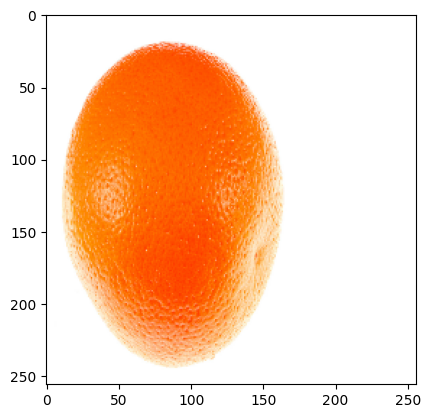

In [25]:
plt.imshow(images[21].astype('uint8'))